In [40]:
% matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
file_path = 'C:/Users/180250/Downloads/NHANES_sample_data.csv'

df = pd.read_csv(file_path)
drop_columns_list = ['RIDRETH3', 'WTINT2YR', 'WTMEC2YR', 'DR1TCARB', 'DR1TTFAT',
                     'LBXGLU', 'BMXHT']
df = df.drop(columns=drop_columns_list)

rename_column_dict = {'RIDAGEYR': 'Age',
                      'RIAGENDR': 'Gender',
                      'BMXWT': 'Body_weight',
                      'BMXBMI': 'BMI',
                      'LBXGH': 'HbA1c',
                      'LBDGLUSI': 'Glucose'}
df = df.rename(columns=rename_column_dict)
df = df.dropna()

df_lim = df[(df['Age'] >= 20) & (18.0 <= df['BMI']) & (df['BMI'] <= 50) & (4.0 <= df['Glucose']) & (df['Glucose'] <= 16.) & (4.0 <= df['HbA1c']) & (df['HbA1c'] <= 10.)]
print(len(df_lim))


2406


In [ ]:
#Visualization

In [42]:
#1
from bokeh.plotting import figure
from bokeh.io import show, output_notebook


In [44]:
p_1 = figure(plot_width = 600, plot_height=600, title='HbA1c-Male', 
            x_axis_label='Age', y_axis_label='HbA1c')
df_male = df[df['Gender'] == 1.0]
p_1.circle(df_male['Age'], df_male['HbA1c'],size=12, color='purple')

output_notebook()
show(p_1)

Loading BokehJS ...

In [72]:
#2
p_2 = figure(plot_width = 600, plot_height=600, title='HbA1c-Female', 
            x_axis_label='Age', y_axis_label='HbA1c')
df_female = df[df['Gender'] == 2.0]
p_2.circle(df_female['Age'], df_female['HbA1c'],size=12, color='pink')

output_notebook()
show(p_2)

Loading BokehJS ...

In [ ]:
#common operation

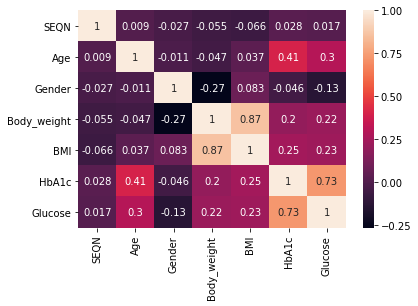

In [51]:
#1
import seaborn as sns
corr = np.corrcoef(np.array(df_lim).T)

sns.heatmap(corr, annot=True, xticklabels=df_lim.columns, yticklabels=df_lim.columns)
plt.show()

In [52]:
#2
df_lim.describe()

,SEQN,Age,Gender,Body_weight,BMI,HbA1c,Glucose
count,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000
mean,78686.866168,49.762677,1.513716,80.385619,28.646800,5.629925,5.788397
std,2918.898600,17.473847,0.499916,19.916045,6.250263,0.710862,1.224134
min,73559.000000,20.000000,1.000000,40.200000,18.100000,4.200000,4.052000
25%,76193.250000,35.000000,1.000000,66.200000,23.925000,5.200000,5.107000
50%,78721.500000,49.000000,2.000000,77.800000,27.600000,5.500000,5.495000
75%,81194.500000,64.000000,2.000000,91.400000,32.000000,5.800000,5.995000
max,83727.000000,80.000000,2.000000,179.400000,50.000000,9.800000,15.598000


In [ ]:
#3


In [85]:
#4
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [99]:
df_lim_cluster = np.array(df_lim[['BMI', 'Glucose']])
scaler = StandardScaler()
df_lim_cluster_scaled = scaler.fit_transform(df_lim_cluster)

kmeans = KMeans(n_clusters=4, random_state=0).fit(df_lim_cluster_scaled)
p_c = figure(plot_width = 600, plot_height=600, title='BMI-Glucose', 
            x_axis_label='BMI', y_axis_label='Glucose')

colors = ['blue', 'yellow', 'pink', 'purple']

for i in range(4):
    i_samples = df_lim_cluster_scaled[kmeans.labels_==i]
    i_samples_origin = df_lim_cluster[kmeans.labels_==i]
    print(len(i_samples))
    
    u = i_samples - np.tile(kmeans.cluster_centers_[i], (len(i_samples), 1))
    dist = np.linalg.norm(u, axis=1)
    print(i_samples_origin[np.argmin(dist)])
    #p_c.circle(i_samples[:, 0], i_samples[:, 1],size=12, color=colors[i])
    #p_c.circle(kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1],size=12, color='black')
    p_c.circle(i_samples_origin[:, 0], i_samples_origin[:, 1],size=12, color=colors[i])
    inversed_cluster_center_i = scaler.inverse_transform(kmeans.cluster_centers_[i])
    p_c.circle(inversed_cluster_center_i[0], inversed_cluster_center_i[1]
               ,size=12, color='black')
    
output_notebook()
show(p_c)

994
[23.4    5.273]
324
[39.8    5.718]
142
[32.9    9.603]
946
[29.8    5.773]


Loading BokehJS ...